# Dengue Prediction Model Implementation

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data into dataframe

In [3]:
df = pd.read_csv('../data/cooked_data/dengue(cooked).csv')
df.head()

,current_temp,wbc,servere_headche,pain_behind_the_eyes,joint_muscle_aches,metallic_taste_in_the_mouth,appetite_loss,addominal_pain,nausea_vomiting,diarrhoea,hemoglobin,_hematocri,platelet,dengue
0,100.0,5.0,1,0,0,1,1,1,0,1,15.0,23.0,140.0,1
1,104.0,1.0,0,1,1,0,0,0,0,0,9.0,22.0,80.0,0
2,104.0,5.0,1,0,0,1,1,1,1,0,9.5,23.0,120.0,1
3,101.0,5.0,1,1,0,0,0,0,0,0,9.5,23.0,100.0,0
4,101.0,5.0,1,0,0,0,0,0,1,0,9.5,23.0,100.0,0


### Let's split indenpendent (Y) and dependent features from data

In [6]:
X = df[[feature for feature in df.columns if feature != 'dengue']]
y = df.dengue

### Now let's split data into training data and testing data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.8,random_state=1)

### Now let's build and train the model

In [9]:
from sklearn.ensemble import RandomForestClassifier
dengue_prediction_model = RandomForestClassifier()

In [10]:
dengue_prediction_model.fit(X_train,y_train)

RandomForestClassifier()

### Now let's evalute the model 

In [14]:
dengue_prediction_model.score(X_test,y_test)

1.0

In [19]:
y_pred = dengue_prediction_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

Text(69.0, 0.5, 'Predicted values')

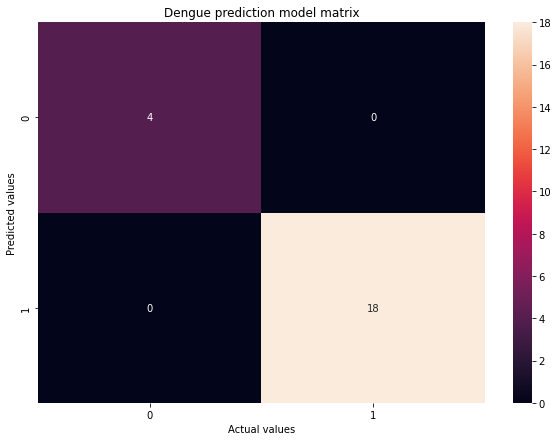

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred=y_pred,y_true=y_test)

plt.figure(figsize=(10,7))
sns.heatmap(data=cm,annot=True)
plt.title('Dengue prediction model matrix')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

### Finally we build the model now we can save the model into file

In [22]:
import joblib
joblib.dump(dengue_prediction_model,filename='../model/dengue_prediction_model.pkl')

['../model/dengue_prediction_model.pkl']